In [1]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

In [2]:
#Import Desired PES
from ipynb.fs.full.water_PES_fortran import PES

In [3]:
#Import Desired Data
prime_link = 1
if type(prime_link) == str:
    prime_data = pd.read_csv(prime_link, header=None, skiprows=None, sep=",")     
    prime_data.to_csv("H2O_262_SPEC_HITRAN2020.csv")
    
    prime_freq = prime_data.loc[:,0]
    prime_freq = np.array(prime_freq)
    
    prime_intensity = prime_data.loc[:,1]
    prime_intensity = np.array(prime_intensity)
    prime_intensity = np.divide(prime_intensity, sum(prime_intensity))
    
elif prime_link == 1: 
    prime_data = pd.read_csv("H2O_262_SPEC_HITRAN2020.csv", sep=",", header=None, skiprows=1)

    prime_freq = prime_data.loc[:,1]
    prime_freq = np.array(prime_freq)
    
    prime_intensity = prime_data.loc[:,2]
    prime_intensity = np.array(prime_intensity)
    prime_intensity = np.divide(prime_intensity, sum(prime_intensity))

### Manual Inputs

In [4]:
molecule = ["H", "O", "H"]

In [5]:
#Temperature
T = 300

In [6]:
#Positions/Bond Lengths/Angles
r1=0.9576257
r2=0.9576257
alpha= 180 - 75.48992362
coord = coord_triatomic(alpha, r1, r2)

In [7]:
mass = ((element["D"] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element["D"] * u * kg_to_me))

In [8]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

### Calculations 

In [9]:
Key, Pos =  Key_and_Pos(coord)

In [10]:
PES_func = PES(Key, Pos, molecule)

In [11]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [12]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [13]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

Fundamental frequencies [cm]^-1 =
[2892.49537551 2764.94808273 1205.86956174   45.73637335   44.99319727
   43.27561791]


In [14]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [15]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [16]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [17]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [18]:
sigma = sigma_ij(displace_val, cubic)

In [19]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

Corrected modes = [2783.52710432] vs Harm. = 2892.49630988819
Corrected modes = [2702.65306534] vs Harm. = 2764.9489759040066
Corrected modes = [1171.87577848] vs Harm. = 1205.8699512812204


In [20]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

In [ ]:
key_data = data_file_maker_triatomic(fundamentals_wn, deltaETOSH, B, allrot, "H20_262_18MiKyZo")

In [21]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [22]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P("H2O", J_max_arr, "B", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q("H2O", J_max_arr, "B", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R("H2O", J_max_arr, "B", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

In [23]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P("H2O", J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q("H2O", J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R("H2O", J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

In [24]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P("H2O", J_max_arr, "A", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q("H2O", J_max_arr, "A", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R("H2O", J_max_arr, "A", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

In [25]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.0051)
##

/Users/thomascross/Documents/PhD/Codes/Epimetheus/H2O/EpiPan_Functions.ipynb:2422: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "source": [


In [26]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.0317)
##

In [27]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 0.0225)
##

In [28]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

/Users/thomascross/Documents/PhD/Codes/Epimetheus/H2O/EpiPan_Functions.ipynb:2460: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "                potential_trans = trans(molecule, i+2, j, i, typing)\n",


In [29]:
# Frequencies from: 14TeBeBr
# Rotational Constants from: 84ReWaXX

exp_B = (15.26, 7.30, 4.94)
exp_J_max_arr, exp_A_rot, exp_B_rot, exp_C_rot = J_max_func(exp_B, T)

mode_100 = 2671.645857
A_mode_100 = 15.73
B_mode_100 = 7.05
C_mode_100 = 4.79

exp_P_nu1, exp_P_rot_nu1, exp_P_index_nu1 = asytop_v_P("H2O", exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_Q_nu1, exp_Q_rot_nu1, exp_Q_index_nu1 = asytop_v_Q("H2O", exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_R_nu1, exp_R_rot_nu1, exp_R_index_nu1 = asytop_v_R("H2O", exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)

mode_010 = 1178.378792
A_mode_010 = 17.47
B_mode_010 = 7.05
C_mode_010 = 4.83

exp_P_nu2, exp_P_rot_nu2, exp_P_index_nu2 = asytop_v_P("H2O", exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_Q_nu2, exp_Q_rot_nu2, exp_Q_index_nu2 = asytop_v_Q("H2O", exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_R_nu2, exp_R_rot_nu2, exp_R_index_nu2 = asytop_v_R("H2O", exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)

mode_001 = 2787.717995
A_mode_001 = 15.63 
B_mode_001 = 7.02
C_mode_001 = 4.74

exp_P_nu3, exp_P_rot_nu3, exp_P_index_nu3 = asytop_v_P("H2O", exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_Q_nu3, exp_Q_rot_nu3, exp_Q_index_nu3 = asytop_v_Q("H2O", exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_R_nu3, exp_R_rot_nu3, exp_R_index_nu3 = asytop_v_R("H2O", exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)


exp_nu1_I = Norm_I(exp_P_rot_nu1, exp_P_index_nu1, exp_Q_rot_nu1, exp_Q_index_nu1, exp_R_rot_nu1, exp_R_index_nu1, T, 1, 0.0051)
##
exp_nu2_I = Norm_I(exp_P_rot_nu2, exp_P_index_nu2, exp_Q_rot_nu2, exp_Q_index_nu2, exp_R_rot_nu2, exp_R_index_nu2, T, 1, 0.0317)
##
exp_nu3_I = Norm_I(exp_P_rot_nu3, exp_P_index_nu3, exp_Q_rot_nu3, exp_Q_index_nu3, exp_R_rot_nu3, exp_R_index_nu3, T, 1, 0.0225)
##
exp_Final_I = Fin_I(exp_nu1_I[0], exp_nu1_I[1], exp_nu1_I[2], exp_nu2_I[0], exp_nu2_I[1], exp_nu2_I[2], exp_nu3_I[0], exp_nu3_I[1], exp_nu3_I[2])

##

In [30]:
harm_B = (B[0], B[1], B[2])
harm_J_max_arr, harm_A_rot, harm_B_rot, harm_C_rot = J_max_func(harm_B, T)

harm_P_nu1, harm_P_rot_nu1, harm_P_index_nu1 = asytop_v_P("H2O", harm_J_max_arr, "B", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu1, harm_Q_rot_nu1, harm_Q_index_nu1 = asytop_v_Q("H2O", harm_J_max_arr, "B", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu1, harm_R_rot_nu1, harm_R_index_nu1 = asytop_v_R("H2O", harm_J_max_arr, "B", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)

harm_P_nu2, harm_P_rot_nu2, harm_P_index_nu2 = asytop_v_P("H2O", harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu2, harm_Q_rot_nu2, harm_Q_index_nu2 = asytop_v_Q("H2O", harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu2, harm_R_rot_nu2, harm_R_index_nu2 = asytop_v_R("H2O", harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)

harm_P_nu3, harm_P_rot_nu3, harm_P_index_nu3 = asytop_v_P("H2O", harm_J_max_arr, "A", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu3, harm_Q_rot_nu3, harm_Q_index_nu3 = asytop_v_Q("H2O", harm_J_max_arr, "A", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu3, harm_R_rot_nu3, harm_R_index_nu3 = asytop_v_R("H2O", harm_J_max_arr, "A", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)


harm_nu1_I = Norm_I(harm_P_rot_nu1, harm_P_index_nu1, harm_Q_rot_nu1, harm_Q_index_nu1, harm_R_rot_nu1, harm_R_index_nu1, T, 1, 0.0051)
##
harm_nu2_I = Norm_I(harm_P_rot_nu2, harm_P_index_nu2, harm_Q_rot_nu2, harm_Q_index_nu2, harm_R_rot_nu2, harm_R_index_nu2, T, 1, 0.0317)
##
harm_nu3_I = Norm_I(harm_P_rot_nu3, harm_P_index_nu3, harm_Q_rot_nu3, harm_Q_index_nu3, harm_R_rot_nu3, harm_R_index_nu3, T, 1, 0.0225)
##
harm_Final_I = Fin_I(harm_nu1_I[0], harm_nu1_I[1], harm_nu1_I[2], harm_nu2_I[0], harm_nu2_I[1], harm_nu2_I[2], harm_nu3_I[0], harm_nu3_I[1], harm_nu3_I[2])

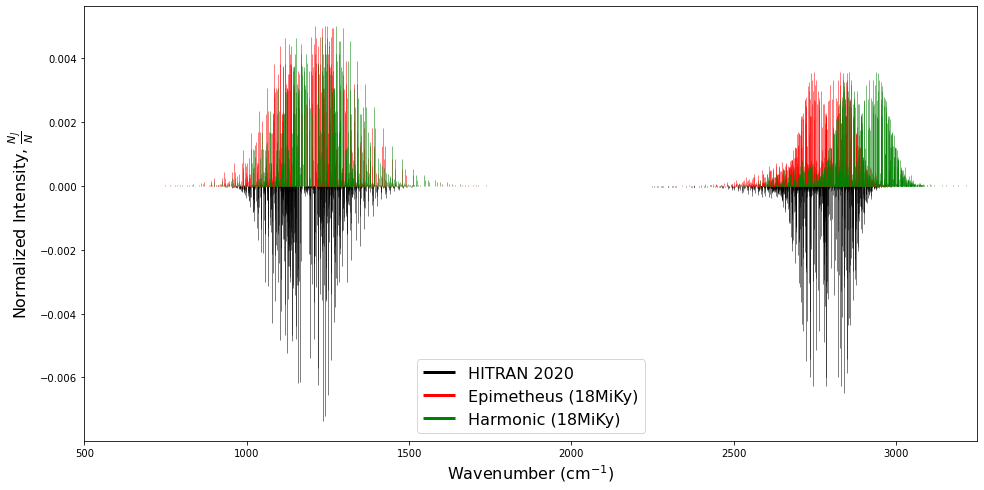

In [35]:
plt.figure(figsize=(16,8))
plt.vlines(prime_freq,0, -prime_intensity, color="k", label="HITRAN 2020", linewidth=.5)

plt.vlines(P_nu1, 0, Final_I[0], "red", label="Epimetheus (18MiKy)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "red", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "red", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "red", linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "red", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "red", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "red", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "red", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "red", linewidth=.5)

plt.vlines(harm_P_nu1, 0, harm_Final_I[0], "green", label="Harmonic (18MiKy)", linewidth=.5)
plt.vlines(harm_Q_nu1, 0, harm_Final_I[1], "green", linewidth=.5)
plt.vlines(harm_R_nu1, 0, harm_Final_I[2], "green", linewidth=.5)

plt.vlines(harm_P_nu2, 0, harm_Final_I[3], "green", linewidth=.5)
plt.vlines(harm_Q_nu2, 0, harm_Final_I[4], "green", linewidth=.5)
plt.vlines(harm_R_nu2, 0, harm_Final_I[5], "green", linewidth=.5)

plt.vlines(harm_P_nu3, 0, harm_Final_I[6], "green", linewidth=.5)
plt.vlines(harm_Q_nu3, 0, harm_Final_I[7], "green", linewidth=.5)
plt.vlines(harm_R_nu3, 0, harm_Final_I[8], "green", linewidth=.5)

plt.xlim(500, 3250)
plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'lower center', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_H20_262_18MiKyZo_epi_harm_{T}K.pdf")

plt.show()

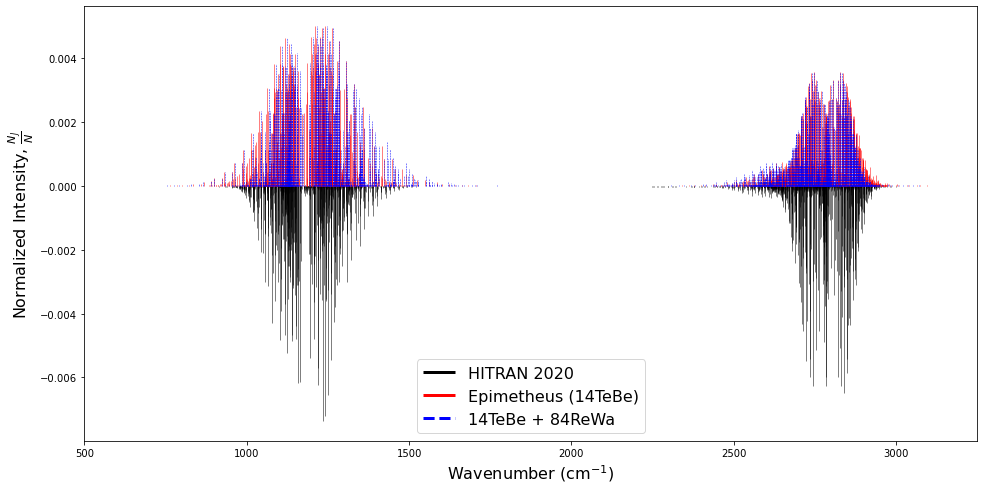

In [36]:
plt.figure(figsize=(16,8))
plt.vlines(prime_freq,0, -prime_intensity, color="k", label="HITRAN 2020", linewidth=.5)

plt.vlines(P_nu1, 0, Final_I[0], "red", label="Epimetheus (14TeBe)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "red", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "red", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "red", linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "red", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "red", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "red", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "red", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "red", linewidth=.5)


plt.vlines(exp_P_nu1, 0, exp_Final_I[0], "blue",linestyle='dashed', label="14TeBe + 84ReWa", linewidth=.5)
plt.vlines(exp_Q_nu1, 0, exp_Final_I[1], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu1, 0, exp_Final_I[2], "blue",linestyle='dashed', linewidth=.5)

plt.vlines(exp_P_nu2, 0, exp_Final_I[3], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_Q_nu2, 0, exp_Final_I[4], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu2, 0, exp_Final_I[5], "blue",linestyle='dashed', linewidth=.5)

plt.vlines(exp_P_nu3, 0, exp_Final_I[6], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_Q_nu3, 0, exp_Final_I[7], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu3, 0, exp_Final_I[8], "blue",linestyle='dashed', linewidth=.5)

plt.xlim(500, 3250)
plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'lower center', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_H20_262_18MiKyZo_epi_lit_{T}K.pdf")

plt.show()